## Importação dos módulos

In [64]:
import polars as pl
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

## Importação e exploração dos dados

In [2]:
classes = pd.DataFrame(np.load('dataset/Classes.npy', allow_pickle= True),
                       columns = ['func_state'])
print(classes.describe())
classes.sort_values('func_state').value_counts()

       func_state
count       50000
unique          5
top      Classe D
freq        10000


func_state
Classe A      10000
Classe B      10000
Classe C      10000
Classe D      10000
Classe E      10000
Name: count, dtype: int64

In [3]:
data1 = pd.DataFrame(np.load("dataset/Dados_1.npy", allow_pickle=True))
data2 = pd.DataFrame(np.load("dataset/Dados_2.npy", allow_pickle=True))
data3 = pd.DataFrame(np.load("dataset/Dados_3.npy", allow_pickle=True))
data4 = pd.DataFrame(np.load("dataset/Dados_4.npy", allow_pickle=True))
data5 = pd.DataFrame(np.load("dataset/Dados_5.npy", allow_pickle=True))

In [4]:
data1.head() 

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,-0.032906,-0.037456,-0.034082,-0.001968,0.084229,0.156574,0.128887,0.042514,-0.036834,-0.013936,...,-0.099786,-0.080654,-0.070954,-0.003636,0.012660,0.028986,0.008340,0.065012,0.091692,NaN
1,0.198619,0.178949,0.072092,0.083383,0.151363,0.108910,-0.099102,-0.195660,-0.125213,0.042914,...,-0.135897,-0.024512,0.103591,0.168580,0.032522,0.117073,0.001361,0.060746,0.093414,NaN
2,-0.000792,0.012913,0.017356,0.024251,0.022153,0.019270,0.017725,0.013644,0.015150,0.020608,...,0.016042,0.014681,0.017848,0.015588,0.011422,0.008025,0.009931,0.006395,0.002775,NaN
3,-0.086419,-0.112830,-0.124875,-0.029539,-0.067434,-0.077257,0.064067,0.075505,0.044812,-0.055143,...,-0.032053,0.002037,0.062153,-0.033044,-0.065966,-0.102277,-0.187535,-0.140448,-0.050016,NaN
4,-0.185975,-0.066973,0.042906,0.007640,-0.038686,-0.012729,0.111408,0.104206,0.040331,-0.042868,...,0.114014,0.089271,0.050639,-0.007533,-0.037725,0.003866,-0.020646,-0.089609,-0.127734,NaN


In [5]:
data2.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,-0.032458,-0.065895,-0.033437,0.023354,-0.050963,-0.079567,-0.158764,-0.225719,-0.146064,-0.081333,...,0.010493,-0.093568,-0.100504,-0.034874,-0.048169,-0.142620,-0.188990,-0.142274,-0.018007,NaN
1,-0.044002,-0.026300,-0.142555,-0.158291,-0.053877,0.194706,0.371975,0.349063,0.101813,-0.060733,...,-0.349464,-0.163123,-0.196713,-0.080442,-0.181516,-0.205376,0.074509,0.403759,0.612137,NaN
2,0.012965,0.018673,0.022848,0.019043,0.014483,0.016875,0.020697,0.016353,0.012179,0.009473,...,-0.017541,0.012973,0.039707,0.041048,0.023619,-0.007386,-0.034698,-0.041762,-0.034946,NaN
3,-0.254154,-0.032329,0.128346,0.168663,0.076516,-0.087474,-0.226562,-0.246696,0.034384,0.222010,...,0.191382,-0.148071,-0.462669,-0.611037,-0.382227,-0.023563,0.282446,0.263467,0.048787,NaN
4,-0.134391,-0.047647,0.127326,0.190226,-0.003597,-0.089642,-0.076058,-0.071603,-0.012291,-0.035886,...,-0.000289,0.142941,0.081774,0.140243,0.106750,0.187425,0.092853,-0.178072,-0.215732,NaN


In [6]:
data3.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,-0.182078,-0.165990,0.147757,0.096662,-0.056907,-0.310580,-0.470552,-0.273967,-0.233207,0.225104,...,0.328633,0.500143,0.550680,0.321061,0.138348,-0.058564,-0.195702,-0.276894,-0.288260,NaN
1,-0.065122,-0.232418,-0.464595,-0.510616,-0.201496,-0.074505,-0.114415,0.194517,0.411912,0.521579,...,0.268816,0.749696,-0.057662,0.055156,-0.692248,-0.331509,-0.041532,0.076351,0.128364,NaN
2,-0.057997,-0.030175,-0.005425,0.009177,0.013701,-0.011606,-0.009907,-0.016371,0.001897,0.010207,...,-0.039403,-0.042588,-0.008130,0.013023,0.004155,-0.002979,-0.005700,0.000764,0.010061,NaN
3,-0.200595,0.315052,0.170669,0.268558,0.201994,-0.371161,-0.040613,-0.098962,0.364336,-0.112432,...,-0.091030,-0.055542,0.326169,0.212304,0.196199,0.237998,0.140512,-0.038527,0.052666,NaN
4,0.519974,0.341149,0.177562,0.133386,-0.224563,-0.336170,-0.318349,-0.283470,-0.142941,-0.067672,...,-0.092936,-0.172695,-0.195384,-0.185443,0.019908,0.100448,0.390107,0.020646,0.221575,NaN


In [7]:
data4.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,...,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
1,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,...,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
2,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,...,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
3,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,...,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
4,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,...,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0


In [8]:
data5.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,20.881372,15.145424,72.027388,48.214406,131.643082,41.718371,77.190388,132.137176,85.425556,48.097219,...,123.293161,56.924154,87.385904,3.348593,16.641810,3.697981,108.142391,17.575017,76.216150,29.315787
1,-1.206457,46.549414,46.111607,10.361296,27.363958,23.396119,30.862030,55.051419,63.062865,38.094601,...,27.373759,33.123615,49.853440,17.299022,40.767354,14.032730,131.006130,56.469465,78.645074,14.561567
2,62.824083,68.291606,40.739371,89.487447,85.516643,13.587243,91.161633,14.344760,18.180341,26.735392,...,51.169306,5.996007,21.488412,86.499347,27.132945,1.962554,9.571521,39.671621,47.163325,23.415191
3,-7.094894,51.408032,76.682650,5.085699,22.564127,76.027758,17.434208,3.158283,23.282799,22.444662,...,-4.630175,38.254381,96.444782,111.459248,51.875774,30.796453,-1.938128,19.691450,43.165328,67.912757
4,14.008962,95.614914,-11.578788,42.905703,49.074270,26.468865,32.333575,26.889737,106.665714,76.073738,...,106.132122,80.656916,109.780935,93.432256,88.455765,49.130590,41.568268,74.413566,12.231324,NaN


## Verificação se e quais colunas possuem valores NaN 

In [9]:
print(pd.DataFrame(np.argwhere(np.isnan(data1)))[1].unique())
print(pd.DataFrame(np.argwhere(np.isnan(data2)))[1].unique())
print(pd.DataFrame(np.argwhere(np.isnan(data3)))[1].unique())
print(pd.DataFrame(np.argwhere(np.isnan(data4)))[1].unique())
print(pd.DataFrame(np.argwhere(np.isnan(data5)))[1].unique())

[200]
[200]
[200]
[139 159 151  59  36  62 176 174 109  23 111  63 130 173 124  26 165  79
  55  47  29 183  20   5  98 119  18  92 123 193  14 192  35  78  15  97
 131 122  71  52 105   8  84  89  93  37  67 166 180   1 162 178  45 198
 121  96  74 175 128 194  65  95  19 114  82 132  13  22 107  58  81 163
   7 106  80 136 186  73  34  88  60  87 134  30  10 189  32 169 126 187
 120 184 156  54 133 168  76 102  94 167 160 177 125  77  11   2 191 146
 153 182 179 113 118 170 104   6  16  28  41  68 116 148  70 110  46  75
   4 154  51 155   3  44 188 161 129 147  48  42   0 144  49  61 138 135
  90  38  56 150 141  17 101  72  83  66  86 185  24  69  25  99  50  64
 199 190  43 127 140  53 145 103 157 195 152 181 117  27  21 196  31   9
  39 112 115 158  57 172  85 142 143 108 164 197  12  91 100 171  33 149
  40 137]
[ 32  35  38  73  81 101 114 171 188  42  70  96 102 120 126 168 182 184
 199  22  50  88  95 113 161 193   2  13  18  97 141 147 175  39  49  90
 107 109 137 196  31  4

In [10]:
data1_check = []
for i in range(len(data1)):
    if not pd.isna(data1.iloc[i, 200]):
        data1_check.append(data1.iloc[i, 200])
print(data1_check)

data2_check = []
for i in range(len(data2)):
    if not pd.isna(data2.iloc[i, 200]):
        data1_check.append(data2.iloc[i, 200])
print(data2_check)

data3_check = []
for i in range(len(data3)):
    if not pd.isna(data3.iloc[i, 200]):
        data1_check.append(data3.iloc[i, 200])
print(data3_check)

c = 0
for i in range(len(data4.columns)):
    for j in range(len(data4)):
        if data4.iloc[j, i] != 50 and not pd.isna(data4.iloc[j, i]):
            c += 1
print(c)

# Não se fez uma análise detalhada dos valores NaN para o conjunto de dados 5 porque
## verificou-se em análise exploratória que os valores são diversos e estão espalhados 

[2.0]
[]
[]
0


## Tratamento dos valores NaN
- data1: coluna 200 possuí valores NaN em todas as linhas, com exceção de uma
- data2: coluna 200 possuí apenas valores NaN
- data3: coluna 200 possuí apenas valores NaN
- data4: coluna 200 possuí valores NaN em todas as linhas, com exceção de uma
- data5: apresenta valores NaN espalhados por toda a matriz, utiliando-se então os vizinhos próximos para imputar, considerando-se que os valores NaN são resultado de problemas na coleta de dados

In [11]:
data1.fillna(0, inplace = True)
data2 = data2.drop(200, axis=1)
data3 = data3.drop(200, axis=1)
data4.fillna(0, inplace = True)

imputer = KNNImputer(n_neighbors=2, weights="uniform")
data5 = pd.DataFrame(imputer.fit_transform(data5))

## Engenharia de requisitos

# Redução da dimensionalidade - PCA 

- Em razão da quantidade de variáveis por conjunto de dados, realizou-se a Análise dos componentes principais, de forma a reduzir o número de variáveis
- Assim, para cada um dos conjuntos fornecidos, primeiro padronizou-se os dados, depois calculou-se os componentes principais
- Agora, sem as variáveis, selecionou-se para cada um dos conjuntos os componentes que explicasse 80% da variância dos dados
- Por fim, compilou-se em uma única matriz os componentes principais selecionados para aplicar ao modelo


In [13]:
datas = [data1, data2, data3, data4, data5]
iteration = 0

for item in datas:
    print(iteration)
    sc = StandardScaler()
    pca = PCA()
    temp_std = sc.fit_transform(item)
    temp_pca = pca.fit_transform(temp_std)

    print('x')
    print(temp_pca)
    cumulated_var = 0
    i = 0
    while cumulated_var <= 0.8:
        cumulated_var += pca.explained_variance_ratio_[i]
        i += 1

    column_names = []
    for i in range(i):
        column_names.append(f"pc{iteration + 1}.{i}")
    
    if iteration == 0:
        new_data = pl.DataFrame(pd.DataFrame(temp_pca).iloc[:,:i+1], schema=column_names)
    else:
        new_data = new_data.hstack(pl.DataFrame(pd.DataFrame(temp_pca).iloc[:,:i+1], schema=column_names))
    iteration += 1


0
x
[[ 5.54129051e-01 -5.68096989e+00  4.89238968e-01 ... -7.94167577e-03
   1.14127644e-01  1.49395217e-01]
 [ 1.93223634e+00  4.56962671e+00 -2.95812087e+00 ... -1.09098039e-01
  -1.30840747e-01  6.26450517e-01]
 [-2.32214692e-01 -5.38401842e-03  7.27221193e-02 ... -3.70522185e-03
  -1.14694974e-02  6.84413650e-03]
 ...
 [-2.84950538e+00  9.10571342e+00  6.80780074e+00 ...  1.05671409e-01
  -1.93660066e-01  1.79136176e-01]
 [-5.32562590e+00  7.12448908e-01 -2.90576743e+00 ... -3.26182248e-01
  -4.41808135e-02 -4.02552995e-03]
 [-6.33321316e+00  2.19544068e+00 -7.66788320e-01 ...  2.50621559e-01
  -1.50108223e-01 -1.10979898e-01]]
1
x
[[ 3.84114605e+00  3.99052746e+00  2.79945400e+00 ...  1.78987708e-01
  -8.50153680e-02  1.40122870e-01]
 [-9.52070172e-01 -5.18723795e+00 -2.62524734e+00 ...  5.02472990e-02
  -3.26466197e-02 -1.50416807e-01]
 [-1.58645805e-01  1.90009048e-01 -2.89365754e-01 ... -7.94885928e-03
   4.98590771e-03  8.52476823e-03]
 ...
 [-3.91078742e+00 -5.01954561e+00 -1

## Preparação e seleção do modelo
- Dividiu-se o conjunto de dados entre treino e teste na proporção 70/30
- Escolheu-se para tentar resolver o problema da classificação do estado da máquina, tendo como base os dados registrados por sensores, uma estrutura de Random Forests em razão de esse modelo ser relativamente simples do ponto de vista estrutural e computacional
- Realizou-se uma busca randomizada entre um conjunto de parâmetros a fim de se encontrar aqueles que gerassem um melhor resultado
- Nesta etapa, a escolha dos pré-parâmetros foi feita de forma arbitrária e seguiu-se os parâmetros sugeridos pelo Random Search

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(
    new_data, classes, test_size=0.3, random_state=12)

In [53]:
rfc = RandomForestClassifier()
possible_params = {
    'n_estimators': [150, 300, 450],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [10, 15],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}
clf = RandomizedSearchCV(estimator= rfc, param_distributions= possible_params,
                         n_iter=5, cv=3, verbose=2, n_jobs=8, random_state=123)
clf.fit(X_train, Y_train.values.ravel())

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END bootstrap=False, criterion=entropy, min_samples_leaf=15, min_samples_split=10, n_estimators=150; total time= 2.6min
[CV] END bootstrap=False, criterion=entropy, min_samples_leaf=15, min_samples_split=10, n_estimators=150; total time= 2.6min
[CV] END bootstrap=False, criterion=entropy, min_samples_leaf=15, min_samples_split=10, n_estimators=150; total time= 2.6min
[CV] END bootstrap=True, criterion=entropy, min_samples_leaf=10, min_samples_split=30, n_estimators=450; total time= 4.8min
[CV] END bootstrap=True, criterion=entropy, min_samples_leaf=10, min_samples_split=30, n_estimators=450; total time= 4.9min
[CV] END bootstrap=True, criterion=entropy, min_samples_leaf=10, min_samples_split=30, n_estimators=450; total time= 4.9min
[CV] END bootstrap=False, criterion=entropy, min_samples_leaf=15, min_samples_split=30, n_estimators=450; total time= 7.7min
[CV] END bootstrap=False, criterion=entropy, min_samples_leaf=15, mi

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=5, n_jobs=8,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'min_samples_leaf': [10, 15],
                                        'min_samples_split': [10, 20, 30],
                                        'n_estimators': [150, 300, 450]},
                   random_state=123, verbose=2)

In [54]:
clf.best_params_

{'n_estimators': 450,
 'min_samples_split': 10,
 'min_samples_leaf': 15,
 'criterion': 'entropy',
 'bootstrap': False}

In [56]:
clf_pred = clf.predict(X_test)

## Resultados

In [71]:
print(f'Acurácia: {metrics.accuracy_score(Y_test, clf_pred)}\n')
print(f'Matriz de confusão: \n{metrics.confusion_matrix(Y_test, clf_pred)}\n')
print(f'Precisão: {metrics.precision_score(Y_test, clf_pred, average="weighted")}\n')
print(f'F1: {metrics.f1_score(Y_test, clf_pred, average="weighted")}\n')

Acurácia: 0.6275333333333334

Matriz de confusão: 
[[1868  301  188  324  327]
 [ 185 2200  380   79  151]
 [ 161  458 1732  203  431]
 [ 319  222  246 1806  459]
 [ 214  210  442  287 1807]]

Precisão: 0.6297113974778199

F1: 0.6271967577920019



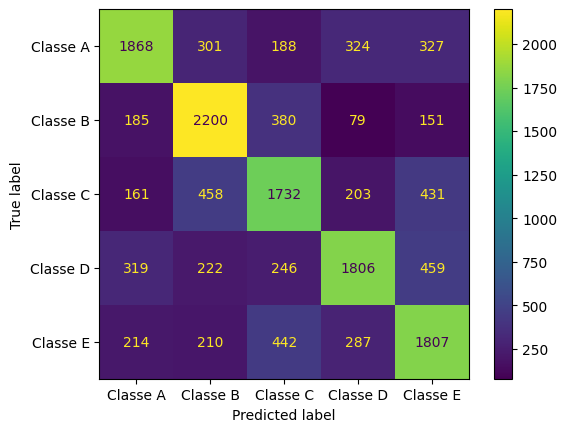

In [75]:
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(Y_test, clf_pred),
                               display_labels=clf.classes_)
disp.plot()
plt.show()

## Considerações sobre os resultados

- A Acurácia do modelo não foi satisfatória, não sendo suficiente para colocar o modelo em produção
- Dos 15.000 registros utilizados na etapada de teste, foram classificados corretamente 9.413 (TP), uma acurácia de 62,75%, com uma precisão de 62,97%

- Para melhorar o desempenho do modelo, primeiro seria necessário entender melhor o que era esperado da coleta de dados e se o tratamento realizado foi coerente (não foram analisados outliers, pois entende-se que a possível existência desses poderia ser esperada); além disso, se fosse decidido continuar com as Random Forests, aumentar o universo de possíveis parâmetros e verificar se é possível melhorar o desempenho do modelo.
- Caso optasse por substituir as Random Forests por outro modelo, sugeriria utilizar um modelo de rede neural, o que já fiz em pesquisas passadas, mas não o fiz agora em razão do tempo necessário para estruturar o número, tamanho e tipo das camadas